# Heirarchical Clustering

### We will be working on a wholesale customer segmentation problem. The data is hosted on the UCI Machine Learning repository. The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [8]:
data.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

There are multiple product categories – Fresh, Milk, Grocery, etc. The values represent the number of units purchased by each client for each product. Our aim is to make clusters from this data that can segment similar clients together.

But before applying Hierarchical Clustering, we have to normalize the data so that the scale of each variable is the same. 

Why is this important? Well, if the scale of the variables is not the same, the model might become biased towards the variables with a higher magnitude like Fresh or Milk

In [9]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


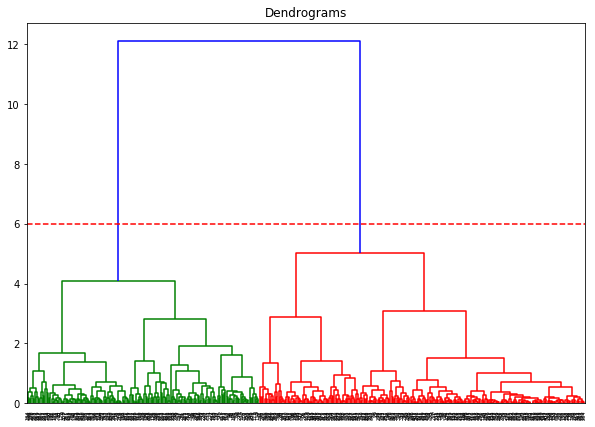

In [11]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

We have two clusters as this line cuts the dendrogram at two points. 

In [12]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0,

In [16]:
data_scaled.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

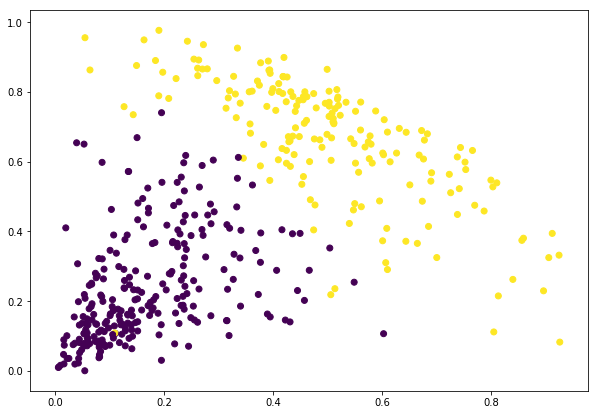

In [20]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_scaled['Milk'], data_scaled['Grocery'], c=cluster.labels_) 

In [25]:
data_scaled['group'] = cluster.labels_
data_scaled['group'] = ['Group 0'if val==0 else 'Group 1' for val in data_scaled['group']]

In [26]:
data_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,group
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809,Group 1
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286,Group 1
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619,Group 1
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494,Group 0
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294,Group 0
5,0.000146,0.000218,0.684944,0.600972,0.372997,0.048462,0.130615,0.105583,Group 1
6,0.000136,0.000204,0.824476,0.217508,0.474247,0.032636,0.213496,0.037056,Group 0
7,0.000145,0.000217,0.548036,0.358368,0.681593,0.120685,0.240141,0.185547,Group 1
8,0.000105,0.000315,0.625457,0.382637,0.649477,0.044578,0.179991,0.078667,Group 1
9,0.000083,0.000125,0.250143,0.462010,0.786371,0.048271,0.309242,0.087379,Group 1


In [21]:
import seaborn as sns

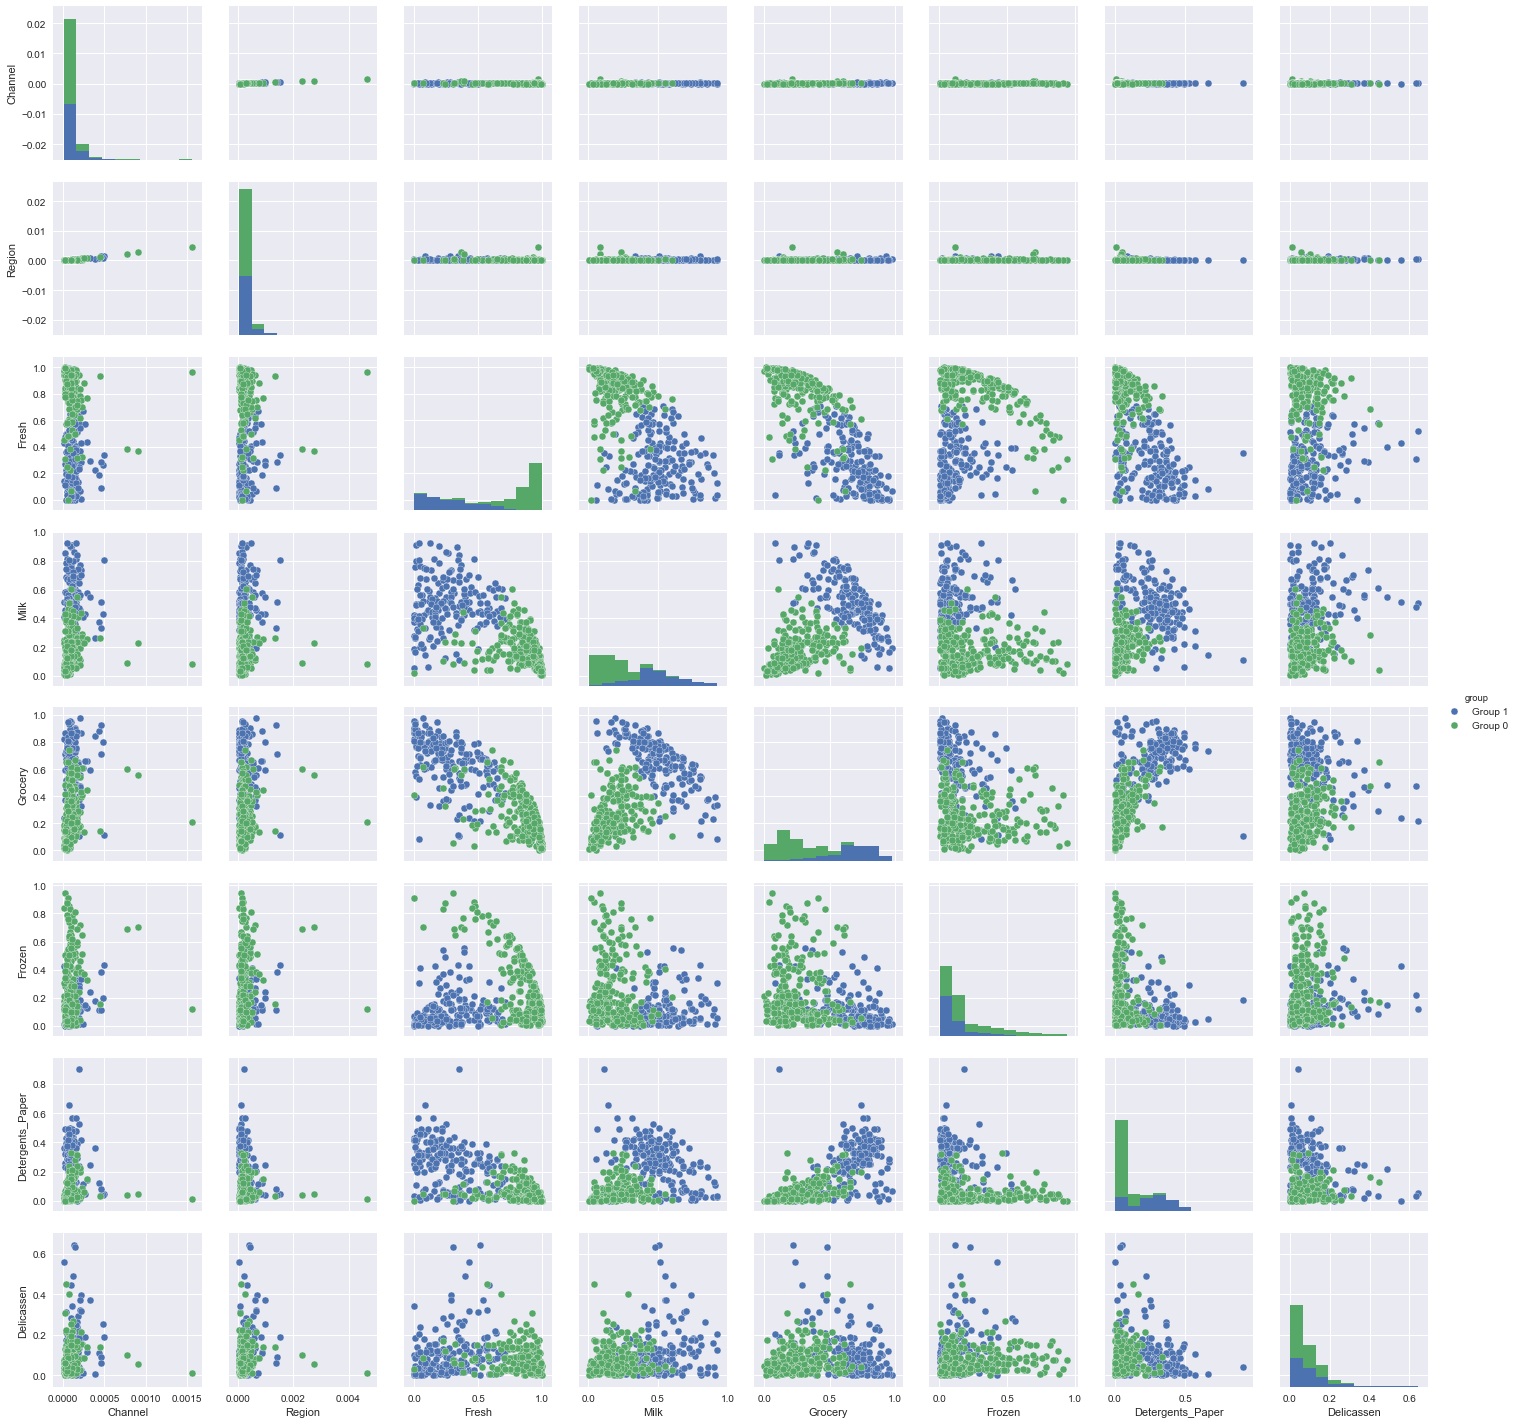

In [28]:
sns.set()
sns.pairplot(data_scaled, hue="group")